In [ ]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

In [2]:
def b_cell(x,t): # x to save states, time
    blimp_1 = x[0]
    bcl_6   = x[1]
    irf_4   = x[2]

#parameters for diff eq
    mu_blimp_1     = 10e-6
    mu_bcl_6       = 2
    mu_irf_4       = 0.1
    sig_blimp_1    = 9 
    sig_bcl_6      = 100
    sig_irf_4      = 2.6
    k_blimp_1      = 1
    k_bcl_6        = 1
    k_irf_4        = 1
    lambda_blimp_1 = 1
    lambda_bcl_6   = 1
    lambda_irf_4   = 1
    #bcr_0          = 10 
    #cd_0           = 1
    #c_0            = 10e-8
    #t_0            = 4


    if t >100.0: 
        bcr_0  = 7
    else: 
        bcr_0  = 0

    if t >120.0:  
        cd_0   = 1 
    else: 
        cd_0   = 0
    # define repeated terms
    a_blimp_1 = (k_blimp_1 * k_blimp_1) / ((k_blimp_1 * k_blimp_1)+ (blimp_1 * blimp_1)) 
    a_bcl_6 = (k_bcl_6 * k_bcl_6) / ((k_bcl_6 * k_bcl_6 )+ (bcl_6 * bcl_6)) 
    a_irf_4 = (k_irf_4 * k_irf_4) / ((k_irf_4 * k_irf_4) + (irf_4 * irf_4))
    b_irf_4 = (irf_4 * irf_4) / ((k_irf_4 * k_irf_4) + (irf_4 * irf_4))

    bcr = bcr_0 * a_bcl_6
    cd40 = cd_0 * a_bcl_6
    # define diff eqs
    # rate of change of BLIMP1 gene expression
    d_blimp_1_dt = mu_blimp_1 + (sig_blimp_1 * a_bcl_6) + (sig_blimp_1 * b_irf_4) - (lambda_blimp_1 * blimp_1) 
    # rate of change of BCL6 gene expression 
    d_bcl_6_dt = mu_bcl_6 + (sig_bcl_6 * a_blimp_1 * a_bcl_6 * a_irf_4)  - ((lambda_bcl_6 + bcr) * bcl_6 )
    # rate of change of IRF4 gene expression
    d_irf_4_dt = mu_irf_4 + (sig_irf_4 * b_irf_4) + cd40 - (lambda_irf_4 * irf_4)

    # return values from eqs as list 
    return[d_blimp_1_dt, d_bcl_6_dt, d_irf_4_dt]

 # to test if the function works
 # print(b_cell([10,1,10], 0))

# to simulate the system using odeint

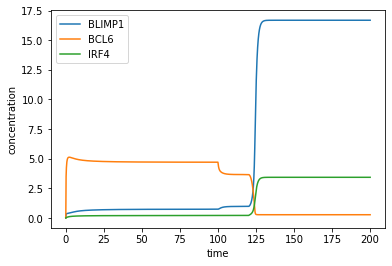

In [3]:
# to simulate the system using odeint

x0 = [0,0,0] # initial conditions
t = np.linspace(0,200,2000) # time steps linearly spaced values 1000 points
# call odeint to solve/simulate odes 
z = odeint(b_cell, x0, t)
# from z we take the states containing results for BLIMP1, BCL6 and IRF4 counts
bl = z[:,0]
bc = z[:,1]
ir = z[:,2]

 # to plot 
 #plt.semilogy(t,bl)
 #plt.semilogy(t,bc)
 #plt.semilogy(t,ir)
 #plt.show() # to show plots

plt.plot(t,bl,label='BLIMP1')
plt.plot(t,bc, label = 'BCL6')
plt.plot(t,ir, label = 'IRF4')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend(loc=0)
plt.show() # to show plots